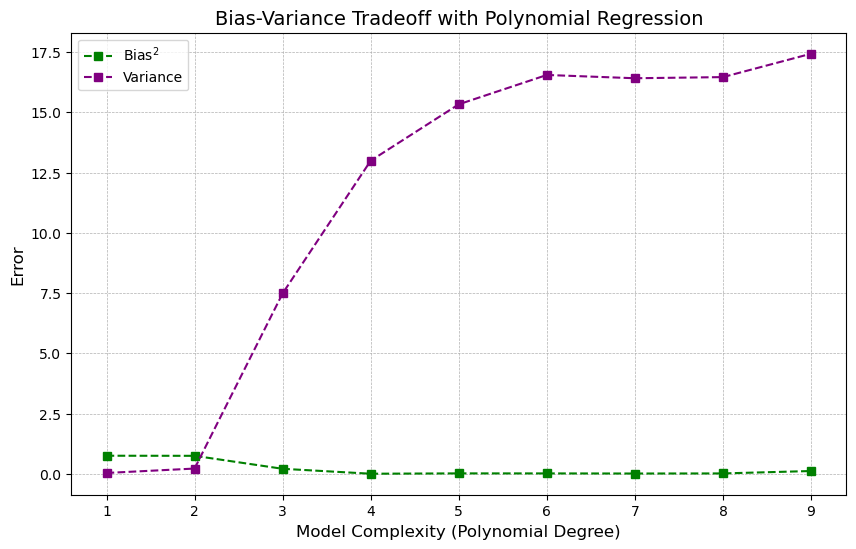

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset (linear function with noise)
np.random.seed(42)
X = np.linspace(1, 10, 100).reshape(-1, 1)
y_true =  np.log(X) - X*np.sin(X) # True underlying function (linear)
y = y_true + np.random.normal(scale=2, size=X.shape)  # Add some noise

# Step 2: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train models of increasing complexity (polynomial degrees) and calculate errors
degrees = list(range(1, 10))  # Polynomial degrees
train_errors = []
test_errors = []
bias_squared = []
variance = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Compute mean squared errors (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # Estimate bias^2 and variance (on test set)
    bias_sq = (np.mean(y_test_pred) - np.mean(y_test)) ** 2
    var = np.var(y_test_pred)
    
    bias_squared.append(bias_sq)
    variance.append(var)

# Step 4: Plot the Bias-Variance tradeoff

plt.figure(figsize=(10, 6))

# Plot bias² and variance
plt.plot(degrees, bias_squared, label="Bias$^2$", color='green', linestyle='--', marker='s')
plt.plot(degrees, variance, label="Variance", color='purple', linestyle='--', marker='s')

# Add labels and title
plt.xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title("Bias-Variance Tradeoff with Polynomial Regression", fontsize=14)

# Add a legend
plt.legend(fontsize=10)

# Display plot
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

